In [97]:
import cv2

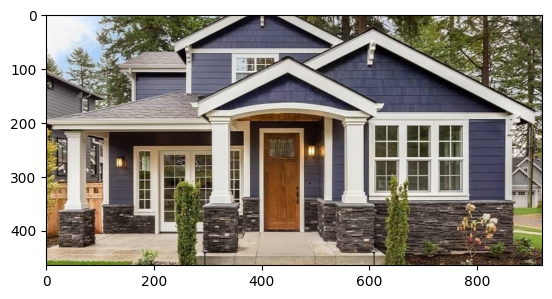

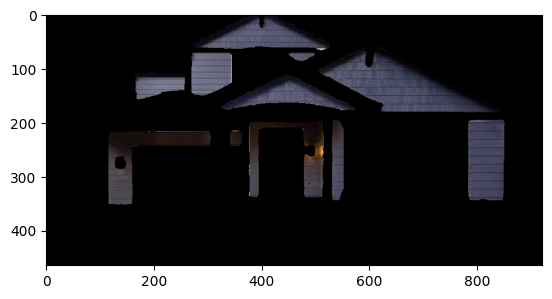

In [98]:
import matplotlib.pyplot as plt

img = cv2.imread("samples/house_2.jpg")
mask = cv2.imread("samples/house_2_mask.png",cv2.IMREAD_UNCHANGED)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

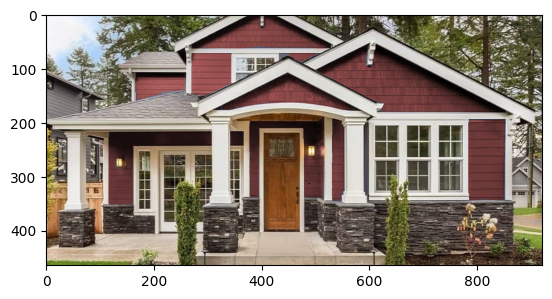

In [101]:
import numpy as np

HUE_VAL = 0
SAT_VAL = 80

hls_mask = cv2.cvtColor(mask[:,:,:3], cv2.COLOR_BGR2HLS)
_, l, _ = cv2.split(hls_mask)
new_hue = np.ones(l.shape,np.uint8)*HUE_VAL
new_sat = np.ones(l.shape,np.uint8)*SAT_VAL
hls = cv2.merge([new_hue, l,new_sat])
transformed_mask = cv2.cvtColor(hls, cv2.COLOR_HLS2BGR)

roi = np.repeat(np.expand_dims((mask[:,:,-1] > 0),-1),3,-1)
transformed_img = np.zeros(img.shape,np.uint8)
transformed_img[roi] = transformed_mask[roi]
transformed_img[~roi] = img[~roi]
plt.imshow(cv2.cvtColor(transformed_img,cv2.COLOR_BGR2RGB))
plt.show()